In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import models, layers

In [ ]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
import matplotlib.pyplot as plt

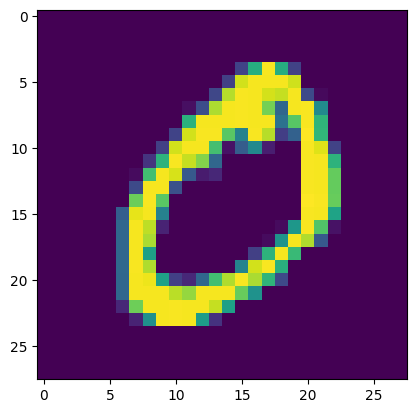

In [ ]:
plt.imshow(x_train[1])

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
model = models.Sequential()

In [ ]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

In [ ]:
# Flatten the data for the fully-connected layers
model.add(layers.Flatten())

# Fully-connected layers for classification
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_2 (Bat  (None, 26, 26, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_3 (Bat  (None, 11, 11, 64)       

In [ ]:
model.fit(x_train, y_train, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 68s 44ms/step - loss: 0.2309 - accuracy: 0.9306 - val_loss: 0.0588 - val_accuracy: 0.9838
Epoch 2/5
1500/1500 [==============================] - 68s 45ms/step - loss: 0.0996 - accuracy: 0.9705 - val_loss: 0.0546 - val_accuracy: 0.9843
Epoch 3/5
1500/1500 [==============================] - 68s 45ms/step - loss: 0.0777 - accuracy: 0.9767 - val_loss: 0.0531 - val_accuracy: 0.9843
Epoch 4/5
1500/1500 [==============================] - 67s 44ms/step - loss: 0.0678 - accuracy: 0.9807 - val_loss: 0.0426 - val_accuracy: 0.9873
Epoch 5/5
1500/1500 [==============================] - 62s 42ms/step - loss: 0.0594 - accuracy: 0.9819 - val_loss: 0.0434 - val_accuracy: 0.9882


In [ ]:
y_prob = model.predict(x_test)

313/313 [==============================] - 3s 9ms/step


In [ ]:
y_pred = y_prob.argmax(axis = 1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9885

In [ ]:
model.predict(x_train[1].reshape(1,28,28)).argmax(axis = 1)

1/1 [==============================] - 0s 45ms/step


array([0])

In [ ]:
import cv2
import numpy as np

img = cv2.imread(r'/content/WhatsApp Image 2024-02-09 at 10.54.23_8c6db364.jpg', cv2.IMREAD_GRAYSCALE)

if img is None:
  print("Error reading image!")

else:
  img = cv2.resize(img, (28, 28))

  img = img.reshape((1, 28, 28, 1))

  img = img.astype('float32') / 255.0

In [ ]:
model.predict(img).argmax(axis = 1)

1/1 [==============================] - 0s 44ms/step


array([3])